In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.chdir(r'C:\Users\Convergytics\Desktop\casestudy')

In [69]:
data=pd.read_csv("C:\\Users\\CA\\Downloads\\DATA_train.csv")

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('test.csv')

In [ ]:
x_train, x_cv, y_train, y_cv = train_test_split(X,train.Item_Outlet_Sales)

In [70]:
data.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
year                      int64
dtype: object

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 11 columns):
Item_Weight             6818 non-null float64
Item_Fat_Content        6818 non-null object
Item_Visibility         6818 non-null float64
Item_Type               6818 non-null object
Item_MRP                6818 non-null float64
Outlet_Identifier       6818 non-null object
Outlet_Size             6818 non-null object
Outlet_Location_Type    6818 non-null object
Outlet_Type             6818 non-null object
Item_Outlet_Sales       6818 non-null float64
year                    6818 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 586.0+ KB


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,year
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.901431,0.070175,140.961302,2177.565011,15.173951
std,4.239785,0.048938,62.516177,1705.407060,8.387296
min,4.555000,0.003589,31.290000,33.290000,4.000000
25%,9.395000,0.033020,93.344250,825.425550,9.000000
50%,12.913153,0.062109,142.798300,1794.331000,14.000000
75%,16.100000,0.094488,186.050300,3095.637100,26.000000
max,21.350000,0.325781,266.888400,12117.560000,28.000000


###### importing basic libraries

In [72]:
import numpy as np
import pandas as pd

In [73]:
from pandas import Series, DataFrame

In [74]:
from sklearn.cross_validation import train_test_split

In [75]:
Data pre-processing steps for regression model
# imputing missing values

train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']

train['Outlet_Size'].fillna('Small',inplace=True)

# creating dummy variables to convert categorical into numeric values

mylist = list(train.select_dtypes(include=['object']).columns)

dummies = pd.get_dummies(train[mylist], prefix= mylist)

train.drop(mylist, axis=1, inplace = True)

X = pd.concat([train,dummies], axis =1 )

#### splitting into training and cv for cross validation

In [77]:
x_train, x_cv, y_train, y_cv = train_test_split(X,data.Item_Outlet_Sales)

###### importing linear regressionfrom sklearn

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lreg = LinearRegression()

###### training the model

In [80]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

###### # predicting on cv, calculating mse, evaluation using r-square

In [82]:
pred_cv = lreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
rmse=np.sqrt(mse)
print(rmse)
print(lreg.score(x_train,y_train))

1406.54550261
0.326466784779


In [83]:
####### test(CV) data
pred_cv = lreg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
rmse=np.sqrt(mse)
print(rmse)
print(lreg.score(x_cv,y_cv))

1354.27240683
0.349593471425


In [84]:
# calculating coefficients

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

coeff

,0,Coefficient Estimate
0,year,11.419010
1,Item_MRP,15.605085


In [85]:
X = data.loc[:,['year','Item_MRP','Item_Weight']]

#splitting into training and cv for cross validation

x_train, x_cv, y_train, y_cv = train_test_split(X,data.Item_Outlet_Sales)

## training the model

lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
pred_cv = lreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
rmse=np.sqrt(mse)
print(rmse)
print(lreg.score(x_train,y_train))

coeff = DataFrame(x_train.columns)

coeff['Coefficient Estimate'] = Series(lreg.coef_)

print(coeff)

1378.53954907
0.330282061796
             0  Coefficient Estimate
0         year              9.329330
1     Item_MRP             15.510458
2  Item_Weight              0.888263


In [88]:
#####test
pred_cv = lreg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
rmse=np.sqrt(mse)
print(rmse)
print(lreg.score(x_cv,y_cv))

1437.8934878
0.337134392433


###### creating dummy variables to convert categorical into numeric values

In [89]:
mylist = list(data.select_dtypes(include=['object']).columns)
mylist

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [90]:
dummies = pd.get_dummies(data[mylist], prefix= mylist)

data.drop(mylist, axis=1, inplace = True)

X = pd.concat([data,dummies], axis =1 )

In [91]:
import matplotlib.pyplot as plt

In [93]:
X1 = X.drop('Item_Outlet_Sales',1)

x_train, x_cv, y_train, y_cv = train_test_split(X1,data.Item_Outlet_Sales, test_size =0.3)

In [94]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
pred_cv = lreg.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
print(np.sqrt(mse))
print(lreg.score(x_train,y_train))

1115.02113931
0.569952066032


In [96]:
pred_cv = lreg.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
print(np.sqrt(mse))
print(lreg.score(x_cv,y_cv))

1146.88607567
0.55351586716


In [97]:
import statsmodels.api as sm
from scipy import stats

In [98]:
lm=sm.OLS(y_train,x_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     232.9
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:54:58   Log-Likelihood:                -40255.
No. Observations:                4772   AIC:                         8.057e+04
Df Residuals:                    4744   BIC:                         8.075e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Item_Weight                         0.3285      3.872      0.085      0.932        -7.263     7.920
Item_Visibility                  -595.3928    352.432     -1.689      0.091     -1286.323    95.537
Item_MRP                           15.7394      0.261     60.295      0.000        15.228    16.251
year                                3.9926      2.277      1.753      0.080        -0.472     8.457
Item_Fat_Content_LF              -126.1456     62.610     -2.015      0.044      -248.891    -3.400
Item_Fat_Content_Low Fat          -41.3682     32.062     -1.290      0.197      -104.224    21.488
Item_Fat_Content_reg               -4.2860     35.330     -0.121      0.903       -73.549    64.977
Item_Type_Baking Goods             61.7402     60.138      1.027      0.305       -56.159   179.639
Item_Type_Breakfast                42.7919     76.145      0.562      0.574      -106.487   192.071
Item_Type_Canned                  -41.6123     56.742     -0.733      0.463      -152.852    69.628
Item_Type_Dairy                   -16.7535     55.995     -0.299      0.765      -126.530    93.023
Item_Type_Drinks                  -48.6103     67.773     -0.717      0.473      -181.476    84.255
Item_Type_Frozen Foods            -44.6793     51.748     -0.863      0.388      -146.129    56.771
Item_Type_Fruits and Vegetables    50.8611     44.414      1.145      0.252       -36.212   137.934
Item_Type_Hard Drinks             -35.5325     97.674     -0.364      0.716      -227.020   155.955
Item_Type_Health and Hygiene        7.1766     65.322      0.110      0.913      -120.884   135.237
Item_Type_Household               -91.0124     51.121     -1.780      0.075      -191.234     9.209
Item_Type_Meat                     65.0662     70.235      0.926      0.354       -72.626   202.759
Item_Type_Others                  -43.3359     96.101     -0.451      0.652      -231.738   145.067
Item_Type_Snack Foods              23.6737     45.212      0.524      0.601       -64.962   112.310
Item_Type_Starchy Foods          -101.5733    120.971     -0.840      0.401      -338.732   135.585
Outlet_Identifier_OUT010         -459.7772     32.275    -14.245      0.000      -523.052  -396.502
Outlet_Identifier_OUT013          -68.7639     15.099     -4.554      0.000       -98.365   -39.163
Outlet_Identifier_OUT017          105.4028     40.596      2.596      0.009        25.816   184.990
Outlet_Identifier_OUT018         -182.6156     24.416     -7.479      0.000      -230.482  -134.750
Outlet_Identifier_OUT019         -430.5744     26.662    -16.149      0.000      -482.844  -378.305
Outlet_Identifier_OUT027          610.0054     17.600     34.660      0.000       575.502   644.509
Outlet_Identifier_OUT035          195.5079     41.047      4.763      0.000       1

######  Remove Non signi

In [99]:
x_train.shape

(4772, 41)

In [100]:
x_train1=x_train.ix[:,[1,2,3,4,21,22,23,24,25,26,27,28,28,29,30,31,32,33,34,35,36,37,38,39,40]]

In [101]:
x_train1.columns

Index([u'Item_Visibility', u'Item_MRP', u'year', u'Item_Fat_Content_LF',
       u'Outlet_Identifier_OUT010', u'Outlet_Identifier_OUT013',
       u'Outlet_Identifier_OUT017', u'Outlet_Identifier_OUT018',
       u'Outlet_Identifier_OUT019', u'Outlet_Identifier_OUT027',
       u'Outlet_Identifier_OUT035', u'Outlet_Identifier_OUT045',
       u'Outlet_Identifier_OUT045', u'Outlet_Identifier_OUT046',
       u'Outlet_Identifier_OUT049', u'Outlet_Size_High', u'Outlet_Size_Medium',
       u'Outlet_Size_Small', u'Outlet_Location_Type_Tier 1',
       u'Outlet_Location_Type_Tier 2', u'Outlet_Location_Type_Tier 3',
       u'Outlet_Type_Grocery Store', u'Outlet_Type_Supermarket Type1',
       u'Outlet_Type_Supermarket Type2', u'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [102]:
x_cv1=x_cv.ix[:,[1,2,3,4,21,22,23,24,25,26,27,28,28,29,30,31,32,33,34,35,36,37,38,39,40]]

In [103]:
est = sm.OLS(y_train, x_train1)

In [104]:
est2 = est.fit()

In [105]:
lm=sm.OLS(y_train,x_train1)

model=lm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     523.1
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:02:29   Log-Likelihood:                -40261.
No. Observations:                4772   AIC:                         8.055e+04
Df Residuals:                    4759   BIC:                         8.063e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Item_Visibility                -571.8032    350.603     -1.631      0.103     -1259.147   115.540
Item_MRP                         15.7236      0.259     60.607      0.000        15.215    16.232
year                              3.7264      1.933      1.927      0.054        -0.064     7.517
Item_Fat_Content_LF            -111.2418     87.449     -1.272      0.203      -282.683    60.199
Outlet_Identifier_OUT010       -467.1663     32.217    -14.501      0.000      -530.327  -404.006
Outlet_Identifier_OUT013        -70.1431     14.861     -4.720      0.000       -99.277   -41.009
Outlet_Identifier_OUT017         79.9785     37.908      2.110      0.035         5.662   154.295
Outlet_Identifier_OUT018       -186.1950     22.695     -8.204      0.000      -230.688  -141.702
Outlet_Identifier_OUT019       -429.6916     26.530    -16.197      0.000      -481.702  -377.681
Outlet_Identifier_OUT027        610.5469     17.296     35.300      0.000       576.638   644.455
Outlet_Identifier_OUT035        168.6771     38.107      4.426      0.000        93.970   243.385
Outlet_Identifier_OUT045        -86.6667     23.511     -3.686      0.000      -132.759   -40.574
Outlet_Identifier_OUT045        -86.6667     23.511     -3.686      0.000      -132.759   -40.574
Outlet_Identifier_OUT046        363.1313     30.909     11.748      0.000       302.536   423.727
Outlet_Identifier_OUT049       -167.0685     25.665     -6.510      0.000      -217.383  -116.754
Outlet_Size_High                -70.1431     14.861     -4.720      0.000       -99.277   -41.009
Outlet_Size_Medium              257.2834     21.122     12.181      0.000       215.874   298.693
Outlet_Size_Small              -371.7377     22.165    -16.772      0.000      -415.191  -328.284
Outlet_Location_Type_Tier 1    -233.6288     17.435    -13.400      0.000      -267.810  -199.448
Outlet_Location_Type_Tier 2     161.9889     19.227      8.425      0.000       124.295   199.682
Outlet_Location_Type_Tier 3    -112.9575     24.350     -4.639      0.000      -160.696   -65.219
Outlet_Type_Grocery Store      -896.8579     22.689    -39.529      0.000      -941.339  -852.377
Outlet_Type_Supermarket Type1   287.9087     21.732     13.248      0.000       245.304   330.513
Outlet_Type_Supermarket Type2  -186.1950     22.695     -8.204      0.000      -230.688  -141.702
Outlet_Type_Supermarket Type3   610.5469     17.296     35.300      0.000       576.638   644.455
==============================================================================
Omnibus:                      438.182   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              927.309
Skew:                           0.588   Prob(JB):                    4.34e-202
Kurtosis:              

In [110]:
x_train1.shape


(4772, 25)

In [118]:
x_train2=x_train1.ix[:,[ 1, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]]

x_cv2=x_cv1.ix[:,[ 1, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]]

lm=sm.OLS(y_train,x_train2)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     627.0
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:11:26   Log-Likelihood:                -40263.
No. Observations:                4772   AIC:                         8.055e+04
Df Residuals:                    4761   BIC:                         8.062e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Item_MRP                         15.7288      0.259     60.630      0.000        15.220    16.237
Outlet_Identifier_OUT010       -485.8936     34.764    -13.977      0.000      -554.047  -417.740
Outlet_Identifier_OUT013        -49.9979     19.472     -2.568      0.010       -88.172   -11.824
Outlet_Identifier_OUT017         67.4317     37.784      1.785      0.074        -6.643   141.506
Outlet_Identifier_OUT018       -205.0966     21.105     -9.718      0.000      -246.472  -163.721
Outlet_Identifier_OUT019       -408.1740     37.332    -10.934      0.000      -481.362  -334.986
Outlet_Identifier_OUT027        637.2818     21.005     30.340      0.000       596.103   678.461
Outlet_Identifier_OUT035        168.9857     38.223      4.421      0.000        94.050   243.921
Outlet_Identifier_OUT045        -82.9126     23.679     -3.501      0.000      -129.335   -36.490
Outlet_Identifier_OUT045        -82.9126     23.679     -3.501      0.000      -129.335   -36.490
Outlet_Identifier_OUT046        364.8024     31.100     11.730      0.000       303.832   425.773
Outlet_Identifier_OUT049       -175.1861     26.022     -6.732      0.000      -226.202  -124.170
Outlet_Size_High                -49.9979     19.472     -2.568      0.010       -88.172   -11.824
Outlet_Size_Medium              256.9991     21.371     12.026      0.000       215.102   298.896
Outlet_Size_Small              -375.7604     21.774    -17.257      0.000      -418.448  -333.073
Outlet_Location_Type_Tier 1    -218.5577     22.444     -9.738      0.000      -262.558  -174.558
Outlet_Location_Type_Tier 2     153.5048     18.499      8.298      0.000       117.238   189.772
Outlet_Location_Type_Tier 3    -103.7062     23.498     -4.413      0.000      -149.774   -57.639
Outlet_Type_Grocery Store      -894.0675     23.787    -37.587      0.000      -940.701  -847.434
Outlet_Type_Supermarket Type1   293.1232     21.446     13.668      0.000       251.079   335.167
Outlet_Type_Supermarket Type2  -205.0966     21.105     -9.718      0.000      -246.472  -163.721
Outlet_Type_Supermarket Type3   637.2818     21.005     30.340      0.000       596.103   678.461
==============================================================================
Omnibus:                      441.133   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              936.950
Skew:                           0.590   Prob(JB):                    3.50e-204
Kurtosis:                       4.822   Cond. No.                     5.97e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-30. This might indi

In [119]:
x_train2=x_train1.ix[:,[ 1, 4,  5, 7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]]

x_cv2=x_cv1.ix[:,[ 1, 4,  5, 7,  8,  9, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]]

lm=sm.OLS(y_train,x_train2)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     696.2
Date:                Sun, 21 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:12:28   Log-Likelihood:                -40264.
No. Observations:                4772   AIC:                         8.055e+04
Df Residuals:                    4762   BIC:                         8.061e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Item_MRP                         15.7348      0.259     60.654      0.000        15.226    16.243
Outlet_Identifier_OUT010       -496.9006     35.037    -14.182      0.000      -565.590  -428.211
Outlet_Identifier_OUT013        -57.2280     19.464     -2.940      0.003       -95.387   -19.069
Outlet_Identifier_OUT018       -201.7002     21.162     -9.531      0.000      -243.187  -160.213
Outlet_Identifier_OUT019       -404.0207     37.451    -10.788      0.000      -477.442  -330.599
Outlet_Identifier_OUT027        640.6927     21.059     30.423      0.000       599.406   681.979
Outlet_Identifier_OUT045       -141.5899     30.160     -4.695      0.000      -200.717   -82.463
Outlet_Identifier_OUT045       -141.5899     30.160     -4.695      0.000      -200.717   -82.463
Outlet_Identifier_OUT046        337.0739     32.411     10.400      0.000       273.533   400.614
Outlet_Identifier_OUT049       -178.2267     26.026     -6.848      0.000      -229.251  -127.203
Outlet_Size_High                -57.2280     19.464     -2.940      0.003       -95.387   -19.069
Outlet_Size_Medium              260.7658     21.492     12.133      0.000       218.632   302.900
Outlet_Size_Small              -347.3094     22.713    -15.291      0.000      -391.838  -302.781
Outlet_Location_Type_Tier 1    -245.1735     23.037    -10.643      0.000      -290.336  -200.011
Outlet_Location_Type_Tier 2     216.5379     24.599      8.803      0.000       168.312   264.764
Outlet_Location_Type_Tier 3    -115.1361     23.589     -4.881      0.000      -161.381   -68.891
Outlet_Type_Grocery Store      -900.9213     23.749    -37.935      0.000      -947.481  -854.362
Outlet_Type_Supermarket Type1   318.1571     22.145     14.367      0.000       274.743   361.572
Outlet_Type_Supermarket Type2  -201.7002     21.162     -9.531      0.000      -243.187  -160.213
Outlet_Type_Supermarket Type3   640.6927     21.059     30.423      0.000       599.406   681.979
==============================================================================
Omnibus:                      439.877   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              932.953
Skew:                           0.589   Prob(JB):                    2.58e-203
Kurtosis:                       4.818   Cond. No.                     5.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.53e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [120]:
pred_cv = model.predict(x_train2)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

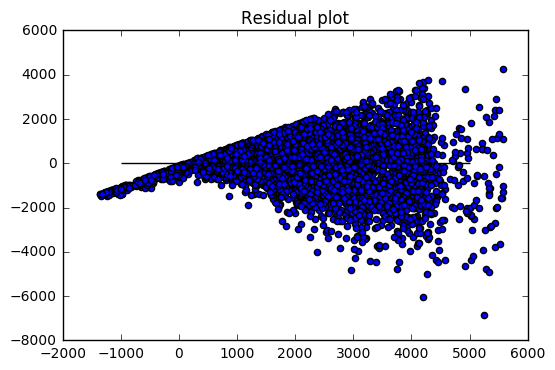

In [121]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_train), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

######  heteroscedocity is present

In [122]:
pred_cv = model.predict(x_cv2)

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif=[variance_inflation_factor(x_train2,i) for i in range(x_train2.shape[1])]

TypeError: unhashable type

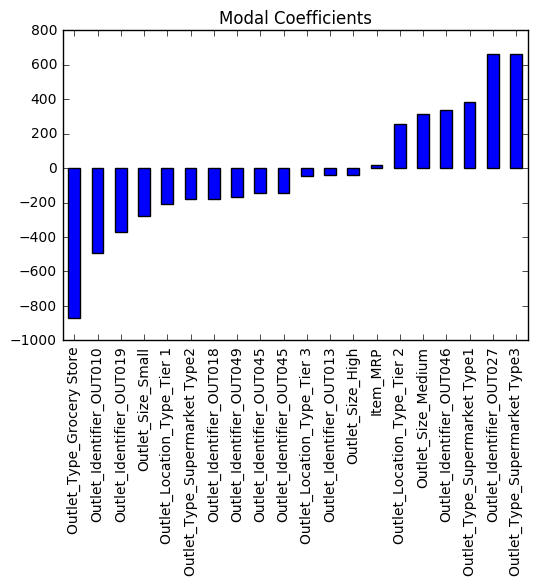

In [127]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(x_train2,y_train)

predictors = x_train2.columns

coef = Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [129]:
from sklearn.linear_model import Ridge

1118.40893869
0.567334843154


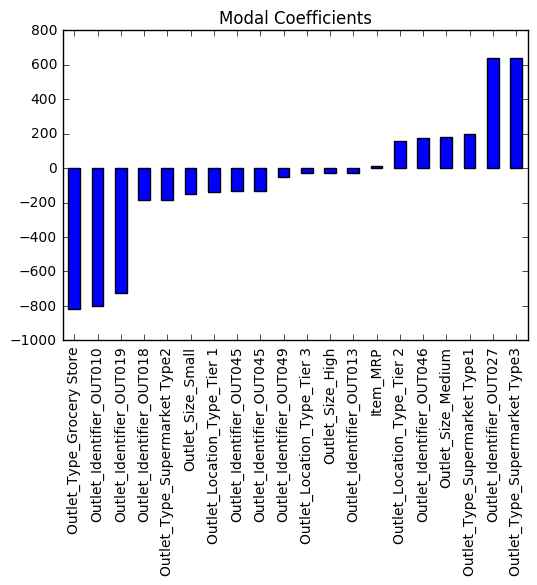

In [130]:
al=0.05

ridgeReg = Ridge(alpha=al, normalize=True)

## training the model

ridgeReg.fit(x_train2,y_train)

pred_cv = ridgeReg.predict(x_train2)

#calculating mse

mse = np.mean((pred_cv - y_train)**2)

print(np.sqrt(mse))
print(ridgeReg.score(x_train2,y_train))

redictors = x_train2.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

In [131]:
## test the model
pred_cv = ridgeReg.predict(x_cv2)
#calculating mse
mse = np.mean((pred_cv - y_cv)**2)
print(np.sqrt(mse))
print(ridgeReg.score(x_cv2,y_cv))

1141.67981165
0.557560276258


In [134]:
list(range(0,25,2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

In [135]:
range(1,10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [136]:
import numpy as np

In [137]:
alp=np.arange(0,25,0.1)

In [138]:
alp=np.arange(0,5,0.001)
alp

array([  0.00000000e+00,   1.00000000e-03,   2.00000000e-03, ...,
         4.99700000e+00,   4.99800000e+00,   4.99900000e+00])

In [140]:
df=[]
alp=np.arange(0,5)
for i in alp:
    ridgeReg = Ridge(alpha=i, normalize=True)
    ## training the model
    ridgeReg.fit(x_train2,y_train)
    pred_cv = ridgeReg.predict(x_train2)
    ##calculating mse
    mse = np.mean((pred_cv - y_train)**2)
    r_square=ridgeReg.score(x_train2,y_train)
    al=round(i,3)
    df.append([al,mse,r_square])

cols = ['Alpha','RMSE', 'r2']
df1 = pd.DataFrame(df, columns=cols)    
df1.head()

,Alpha,RMSE,r2
0,0.0,1.249266e+06,0.567879
1,1.0,1.547569e+06,0.464696
2,2.0,1.812961e+06,0.372897
3,3.0,1.992866e+06,0.310667
4,4.0,2.121082e+06,0.266318


In [141]:
df=[]
alp=np.arange(0,1,0.01)
for i in alp:
    ridgeReg = Ridge(alpha=i, normalize=True)
    ## training the model
    ridgeReg.fit(x_train2,y_train)
    pred_cv = ridgeReg.predict(x_train2)
    ##calculating mse
    mse = np.mean((pred_cv - y_train)**2)
    r_square=ridgeReg.score(x_train2,y_train)
    al=round(i,3)
    df.append([al,mse,r_square])

cols = ['Alpha','RMSE', 'r2']
df1 = pd.DataFrame(df, columns=cols)    
df1.head()

,Alpha,RMSE,r2
0,0.00,1.249266e+06,0.567879
1,0.01,1.248456e+06,0.568159
2,0.02,1.248769e+06,0.568051
3,0.03,1.249278e+06,0.567875
4,0.04,1.249971e+06,0.567635


In [142]:
df=[]
alp=np.arange(0,1,0.001)
for i in alp:
    ridgeReg = Ridge(alpha=i, normalize=True)
    ## training the model
    ridgeReg.fit(x_train2,y_train)
    pred_cv = ridgeReg.predict(x_train2)
    ##calculating mse
    mse = np.mean((pred_cv - y_train)**2)
    r_square=ridgeReg.score(x_train2,y_train)
    al=round(i,3)
    df.append([al,mse,r_square])

cols = ['Alpha','RMSE', 'r2']
df1 = pd.DataFrame(df, columns=cols)    
df1.head()

,Alpha,RMSE,r2
0,0.000,1.249266e+06,0.567879
1,0.001,1.248349e+06,0.568196
2,0.002,1.248353e+06,0.568195
3,0.003,1.248358e+06,0.568193
4,0.004,1.248366e+06,0.568190


In [143]:
a=.01
ridgeReg = Ridge(alpha=a, normalize=True)
## training the model
ridgeReg.fit(x_train2,y_train)
pred_cv = ridgeReg.predict(x_train2)
#calculating mse
mse = np.mean((pred_cv - y_train)**2)
print(np.sqrt(mse))
## calculating score
print(ridgeReg.score(x_train2,y_train))

1117.34306362
0.568159134228


In [144]:
pred_cv = ridgeReg.predict(x_cv2)
#calculating mse
mse = np.mean((pred_cv - y_cv)**2)
print(np.sqrt(mse))
## calculating score
print(ridgeReg.score(x_cv2,y_cv))

1141.60220256
0.557620426529


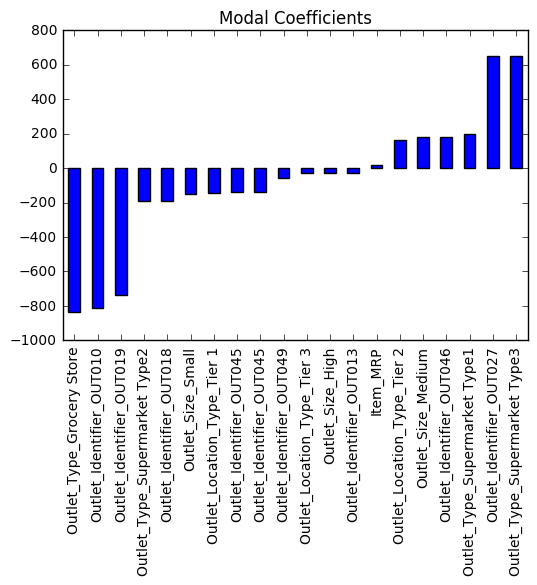

In [145]:
predictors = x_train2.columns

coef = Series(ridgeReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

###### Lasso regression

In [146]:
from sklearn.linear_model import Lasso

In [147]:
lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(x_train2,y_train)
pred_cv = lassoReg.predict(x_train2)
# calculating mse
mse = np.mean((pred_cv - y_train)**2)
print(np.sqrt(mse))
lassoReg.score(x_train2,y_train)

1118.95977207


0.56690854988671258

In [148]:
pred_cv = lassoReg.predict(x_cv2)
# calculating mse
mse = np.mean((pred_cv - y_cv)**2)
print(np.sqrt(mse))
print(lassoReg.score(x_cv2,y_cv))

1140.94731373
0.558127829801


In [149]:
df=[]
alp=np.arange(0,5,1)
for i in alp:
    lassoReg = Lasso(alpha=i, normalize=True)
    lassoReg.fit(x_train2,y_train)
    pred_cv = lassoReg.predict(x_train2)
    mse = np.mean((pred_cv - y_train)**2)
    mse=np.sqrt(mse)
    r_square=lassoReg.score(x_train2,y_train)
    al=round(i,3)
    df.append([al,mse,r_square])

cols = ['Alpha','RMSE', 'r2']
df1 = pd.DataFrame(df, columns=cols)    
df1.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


,Alpha,RMSE,r2
0,0.0,1117.295104,0.568196
1,1.0,1128.331891,0.559623
2,2.0,1148.876420,0.543441
3,3.0,1177.399786,0.520489
4,4.0,1216.209416,0.488357


In [150]:
df=[]
alp=np.arange(0,1,0.01)
for i in alp:
    lassoReg = Lasso(alpha=i, normalize=True)
    lassoReg.fit(x_train2,y_train)
    pred_cv = lassoReg.predict(x_train2)
    mse = np.mean((pred_cv - y_train)**2)
    mse=np.sqrt(mse)
    r_square=lassoReg.score(x_train2,y_train)
    al=round(i,3)
    df.append([al,mse,r_square])

cols = ['Alpha','RMSE', 'r2']
df1 = pd.DataFrame(df, columns=cols)    
df1.head()

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator


,Alpha,RMSE,r2
0,0.00,1117.295104,0.568196
1,0.01,1117.297001,0.568195
2,0.02,1117.302692,0.568190
3,0.03,1117.313134,0.568182
4,0.04,1117.327220,0.568171


In [151]:
b=0.01
lassoReg = Lasso(alpha=b, normalize=True)
lassoReg.fit(x_train2,y_train)
pred_cv = lassoReg.predict(x_train2)
# calculating mse
mse = np.mean((pred_cv - y_train)**2)
print(np.sqrt(mse))
lassoReg.score(x_train2,y_train)

1117.2970013


0.56819473865808479

In [152]:
pred_cv = lassoReg.predict(x_cv2)
# calculating mse test (cv data)
mse = np.mean((pred_cv - y_cv)**2)
print(np.sqrt(mse))
lassoReg.score(x_cv2,y_cv)

1141.73288024


0.55751914353085419

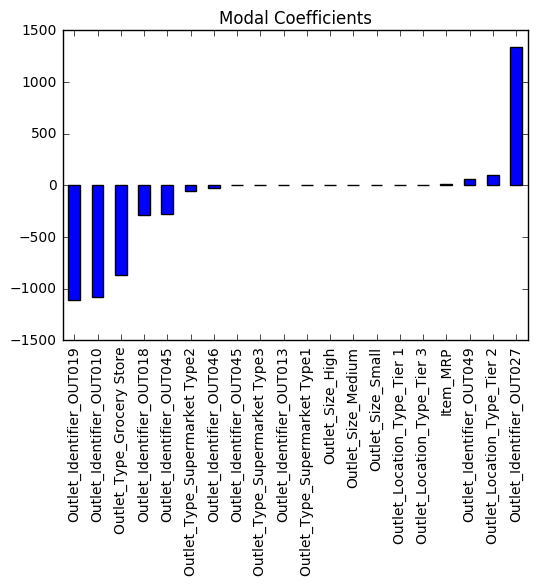

In [153]:
predictors = x_train2.columns

coef = Series(lassoReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

######  Elastic Net Regression

###### Alpha = a + b           and     l1_ratio =  a / (a+b)

where, a and b weights assigned to L1 and L2 term respectively. So when we change the values of alpha and l1_ratio, a and b are set aaccordingly such that they control trade off between L1 and L2 as:

a * (L1 term) + b* (L2 term)

Let alpha (or a+b) = 1, and now consider the following cases:

If l1_ratio =1, therefore if we look at the formula of l1_ratio, we can see that l1_ratio can only be equal to 1 if a=1, which implies b=0. Therefore, it will be a lasso penalty.
Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.
For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.

In [154]:
from sklearn.linear_model import ElasticNet
alp=b+a ##########train model
l1_r=b/(alp)
ENreg = ElasticNet(alpha=alp, l1_ratio=l1_r, normalize=False)
ENreg.fit(x_train2,y_train)
pred_cv = ENreg.predict(x_train2)
#calculating mse
mse = np.mean((pred_cv - y_train)**2)
r_square=ENreg.score(x_train2,y_train)
print(np.sqrt(mse))
print(r_square)

1117.80198652
0.567804324016


In [155]:
pred_cv = ENreg.predict(x_cv2)
#calculating mse
mse = np.mean((pred_cv - y_cv)**2)
r_square=ENreg.score(x_cv2,y_cv)
print(np.sqrt(mse))
print(r_square)

1141.82010181
0.557451535168


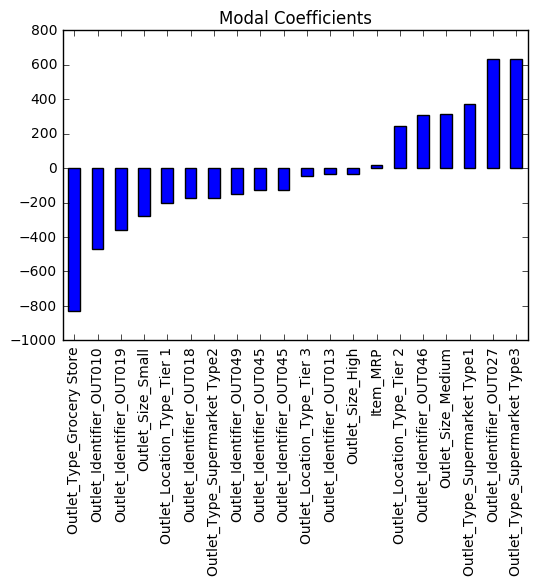

In [156]:
predictors = x_train2.columns

coef = Series(ENreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

###### Random forest 

In [157]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [235]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100) ##42/3
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

###### No.  trees r  n_estimators  for classification sqrt(p) 
##### for regression p/3    p is no. variables  (normaly 30,50,100)

In [236]:
pred_cv=rf.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
r_square=rf.score(x_train,y_train)
print(np.sqrt(mse))
print(r_square)

423.339848361
0.938008954181


######  overfitting problem occurce

In [173]:
pred_cv=rf.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
r_square=rf.score(x_cv,y_cv)
print(np.sqrt(mse))
print(r_square)

1180.07615056
0.527300071987


###### select below parameters
n_estimators: in general the more trees the less likely the algorithm is to overfit. So try increasing this. The lower this number, the closer the model is to a decision tree, with a restricted feature set.

max_features: try reducing this number (try 30-50% of the number of features). This determines how many features each tree is randomly assigned. The smaller, the less likely to overfit, but too small will start to introduce under fitting.

max_depth: Experiment with this. This will reduce the complexity of the learned models, lowering over fitting risk. Try starting small, say 5-10, and increasing you get the best result.

min_samples_leaf: Try setting this to values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.or(5% total variables)

In [261]:
rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=5,max_depth=5,random_state=123)

In [242]:
# Train the model on training data
rf.fit(x_train, y_train)
pred_cv=rf.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
r_square=rf.score(x_train,y_train)
print(np.sqrt(mse))
print(r_square)

1058.00756623
0.612806364114


In [243]:
pred_cv=rf.predict(x_cv)
mse = np.mean((pred_cv - y_cv)**2)
r_square=rf.score(x_cv,y_cv)
print(np.sqrt(mse))
print(r_square)

1086.18344594
0.599528302422


###### min_samples_leaf is at least 5% total variables

In [273]:
df=[]
a=np.arange(2,15,1)
b=np.arange(5,15,1)
for i in a:
    for j in b:
        rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=i,max_depth=j,random_state=123)
        rf.fit(x_train, y_train)
        r_square=rf.score(x_train,y_train)
        r_square1=rf.score(x_cv,y_cv)
        a1=i
        b1=j
        df.append([a1,b1,r_square,r_square1])

cols = ['min_samples_leaf','max_depth','R2_train', 'r2_test']
df1 = pd.DataFrame(df, columns=cols)    
df1

,min_samples_leaf,max_depth,R2_train,r2_test
0,2,5,0.614208,0.598539
1,2,6,0.631322,0.598345
2,2,7,0.652284,0.596095
3,2,8,0.677706,0.592593
4,2,9,0.706016,0.588573
5,2,10,0.735591,0.582569
6,2,11,0.764396,0.578398
7,2,12,0.790414,0.574465
8,2,13,0.813551,0.570885
9,2,14,0.832270,0.567410


In [256]:
i=2
j=5
df=[]
rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf=i,max_depth=j)
rf.fit(x_train, y_train)
pred_cv=rf.predict(x_train)
mse = np.mean((pred_cv - y_train)**2)
rmse=np.sqrt(mse)
r_square=rf.score(x_train,y_train)
a1=i
b1=j
df.append([a1,b1,rmse,r_square])
df

[[2, 5, 1057.0131039189864, 0.61353389863862517]]

In [252]:
df1

,min_samples_leaf,max_depth,RMSE,r2
0,0.99,5,1057.012435,0.613534
1,0.99,6,1032.746969,0.631075
2,0.99,7,1002.684269,0.652240
3,0.99,8,965.634372,0.677466
4,0.99,9,921.944153,0.705991
5,0.99,10,874.437118,0.735511
6,0.99,11,831.416516,0.760895
7,0.99,12,779.346500,0.789907
8,0.99,13,738.840918,0.811178
9,0.99,14,694.618534,0.833105


In [271]:
from sklearn.metrics import roc_curve

In [ ]:
pred_cv=rf.predict(x_cv2)
mse = np.mean((pred_cv - y_cv)**2)
r_square=rf.score(x_cv2,y_cv)
print(np.sqrt(mse))
print(r_square)

In [35]:
f_imp=pd.Series(rf.feature_importances_,index=x_train.columns)
f_imp.sort_values(ascending=False)

Item_MRP                           0.443035
Outlet_Type_Grocery Store          0.195712
Item_Visibility                    0.095992
Item_Weight                        0.050825
year                               0.035692
Outlet_Identifier_OUT027           0.027037
Outlet_Type_Supermarket Type3      0.025379
Item_Type_Fruits and Vegetables    0.009367
Item_Type_Snack Foods              0.009337
Item_Type_Household                0.006751
Item_Type_Dairy                    0.006678
Item_Fat_Content_Low Fat           0.006228
Item_Type_Drinks                   0.005577
Outlet_Identifier_OUT035           0.005543
Item_Type_Frozen Foods             0.005501
Item_Type_Baking Goods             0.005453
Item_Fat_Content_reg               0.005258
Outlet_Identifier_OUT045           0.004608
Item_Type_Health and Hygiene       0.004429
Item_Type_Canned                   0.004148
Item_Type_Breakfast                0.003717
Outlet_Identifier_OUT046           0.003618
Item_Type_Meat                  

In [37]:
rf1 = RandomForestRegressor(n_estimators = 14,oob_score=True) ##42/3
# Train the model on training data
rf1.fit(x_train, y_train)

C:\Program Files\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=14, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [38]:
pred_cv1=rf1.predict(x_cv)

mse1 = np.mean((pred_cv1 - y_cv)**2)
r_square1=rf1.score(x_cv,y_cv)
print(mse1)
print(r_square1)

1294879.23478
0.540771153901


In [41]:
rf1.oob_score_

0.45050142499824264

In [42]:
x_imp_var=x_train[['Item_MRP',                          
'Outlet_Type_Grocery Store',          
'Item_Visibility',                    
'Item_Weight',                        
'year']]

In [43]:
x_cv_imp_var=x_cv[['Item_MRP',                          
'Outlet_Type_Grocery Store',          
'Item_Visibility',                    
'Item_Weight',                        
'year']]

In [63]:
rf2 = RandomForestRegressor(n_estimators = 100,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_imp_var)
pred_cv3=rf2.predict(x_cv_imp_var)
#mse2 = np.mean((pred_cv2 - y_train)**2)
Tr_square2=rf2.score(x_imp_var,y_train)
CVr_square2=rf2.score(x_cv_imp_var,y_cv)
print(Tr_square2)
print(CVr_square2)
#print(rf2.oob_score_(x_imp_var,y_train))
#print(rf2.oob_score_(x_cv_imp_var,y_cv))

0.934100060658
0.550756190411


In [240]:
pred_cv2=rf2.predict(x_cv_imp_var)

mse2 = np.mean((pred_cv2 - y_cv)**2)
r_square2=rf2.score(x_cv_imp_var,y_cv)
print(r_square2)
print(rf2.oob_score_)

-0.754371478364
0.527933665839


In [44]:
rf2 = RandomForestRegressor(n_estimators = 14,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_cv_imp_var)

mse2 = np.mean((pred_cv2 - y_cv)**2)
r_square2=rf.score(x_cv,y_cv)
print(mse2)
print(r_square2)

1315195.25528
0.540771153901


In [45]:
rf2.oob_score_

0.4410601675736846

In [46]:
rf2 = RandomForestRegressor(n_estimators = 100,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_cv_imp_var)

mse2 = np.mean((pred_cv2 - y_cv)**2)
r_square2=rf.score(x_cv,y_cv)
print(mse2)
print(r_square2)
print(rf2.oob_score_)

1280011.23895
0.540771153901
0.528096010086


In [47]:
rf2 = RandomForestRegressor(n_estimators = 100,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_cv_imp_var)

mse2 = np.mean((pred_cv2 - y_cv)**2)
rmse=np.sqrt(mse2)
r_square2=rf.score(x_cv_imp_var,y_cv)
print(mse2)
print(r_square2)
print(rf2.oob_score_)

,year
0,4
1,4
2,14
3,4
4,16


In [48]:
df=[]
alp=np.arange(14,200,1)
for i in alp:
    rf2 = RandomForestRegressor(n_estimators = i,oob_score=True) ##42/3
    rf2.fit(x_imp_var, y_train)
    pred_cv2=rf2.predict(x_cv_imp_var)
    #mse2 = np.mean((pred_cv2 - y_cv)**2)
    #r_square2=rf.score(x_cv,y_cv)
    error=1-rf2.oob_score_
    al=round(i,3)
    df.append([al,error])

cols = ['No.Trees','Error']
df1 = pd.DataFrame(df, columns=cols)    
df1

,No.Trees,Error
0,14.0,0.547605
1,15.0,0.545533
2,16.0,0.539663
3,17.0,0.534748
4,18.0,0.529094
5,19.0,0.530089
6,20.0,0.527968
7,21.0,0.513796
8,22.0,0.513568
9,23.0,0.508437


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

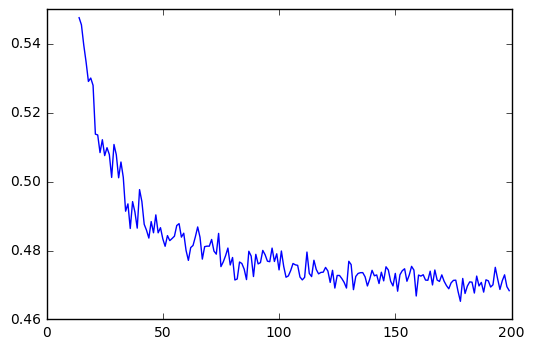

In [50]:
x_plot = plt.plot(df1['No.Trees'],df1['Error'], c='b')

In [ ]:
df=[]
alp=np.arange(14,200,1)
for i in alp:
    rf2 = RandomForestRegressor(n_estimators = i,oob_score=True) ##42/3
    rf2.fit(x_imp_var, y_train)
    pred_cv2=rf2.predict(x_cv_imp_var)
    #mse2 = np.mean((pred_cv2 - y_cv)**2)
    #r_square2=rf.score(x_cv,y_cv)
    error=1-rf2.oob_score_
    al=round(i,3)
    df.append([al,error])

cols = ['No.Trees','Error']
df1 = pd.DataFrame(df, columns=cols)    

In [54]:
rf2 = RandomForestRegressor(n_estimators = 100,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_imp_var)

#mse2 = np.mean((pred_cv2 - y_cv)**2)
#rmse=np.sqrt(mse2)
r_square2=rf2.score(x_imp_var,y_train)
print(r_square2)
print(rf2.oob_score_)

0.934147025361
0.524579290865


In [55]:
rf2 = RandomForestRegressor(n_estimators = 100,oob_score=True) ##42/3
# Train the model on training data
rf2.fit(x_imp_var, y_train)
pred_cv2=rf2.predict(x_cv_imp_var)

#mse2 = np.mean((pred_cv2 - y_cv)**2)
#rmse=np.sqrt(mse2)
r_square2=rf2.score(x_cv_imp_var,y_cv)
print(r_square2)
print(rf2.oob_score_)

0.544676374321
0.525748834


###### from sklearn.model_selection import RandomizedSearchCV
###### Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 10)]
###### Number of features to consider at every split
max_features = ['auto', 'sqrt']
###### Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
###### Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
###### Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
###### Method of selecting samples for training each tree
bootstrap = [True, False]
###### Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [276]:
import sklearn
sklearn.__version__b

0.17.1


boosting: weaklearner to strong learner and sequential pattern
stump:tree which having 2 nodes and it is weak learner(more misclassification/ more error)
adaboost: combine all stumps
equal importance in decision tree but in adaboost not gives equal importance based on error (more error more wietage)

1. combine all weak learner
2. dont give equal wietage
3. sequential process